In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..\..')

from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models import MixedModelDensityEstimator
from models import DIFDensityEstimatorLayer
from models import RealNVPDensityEstimatorLayer

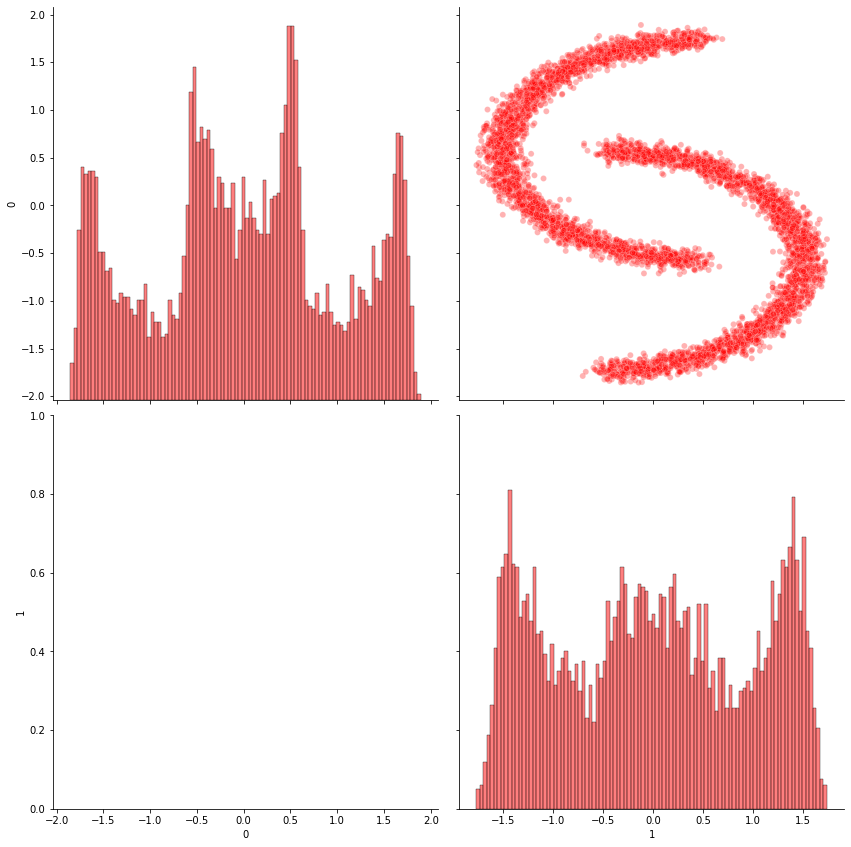

In [3]:
torch.manual_seed(1)
example =  "Moons"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [ ]:
torch.manual_seed(0)
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/5)
structure = [[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

 11%|████████████▋                                                                                                         | 322/3000 [16:57<13:37:01, 18.31s/it, loss = 1.20498526096344]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [07:26<00:00,  6.72it/s, loss = 1.1507056951522827]


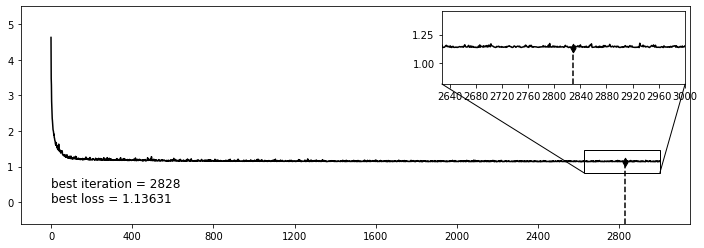

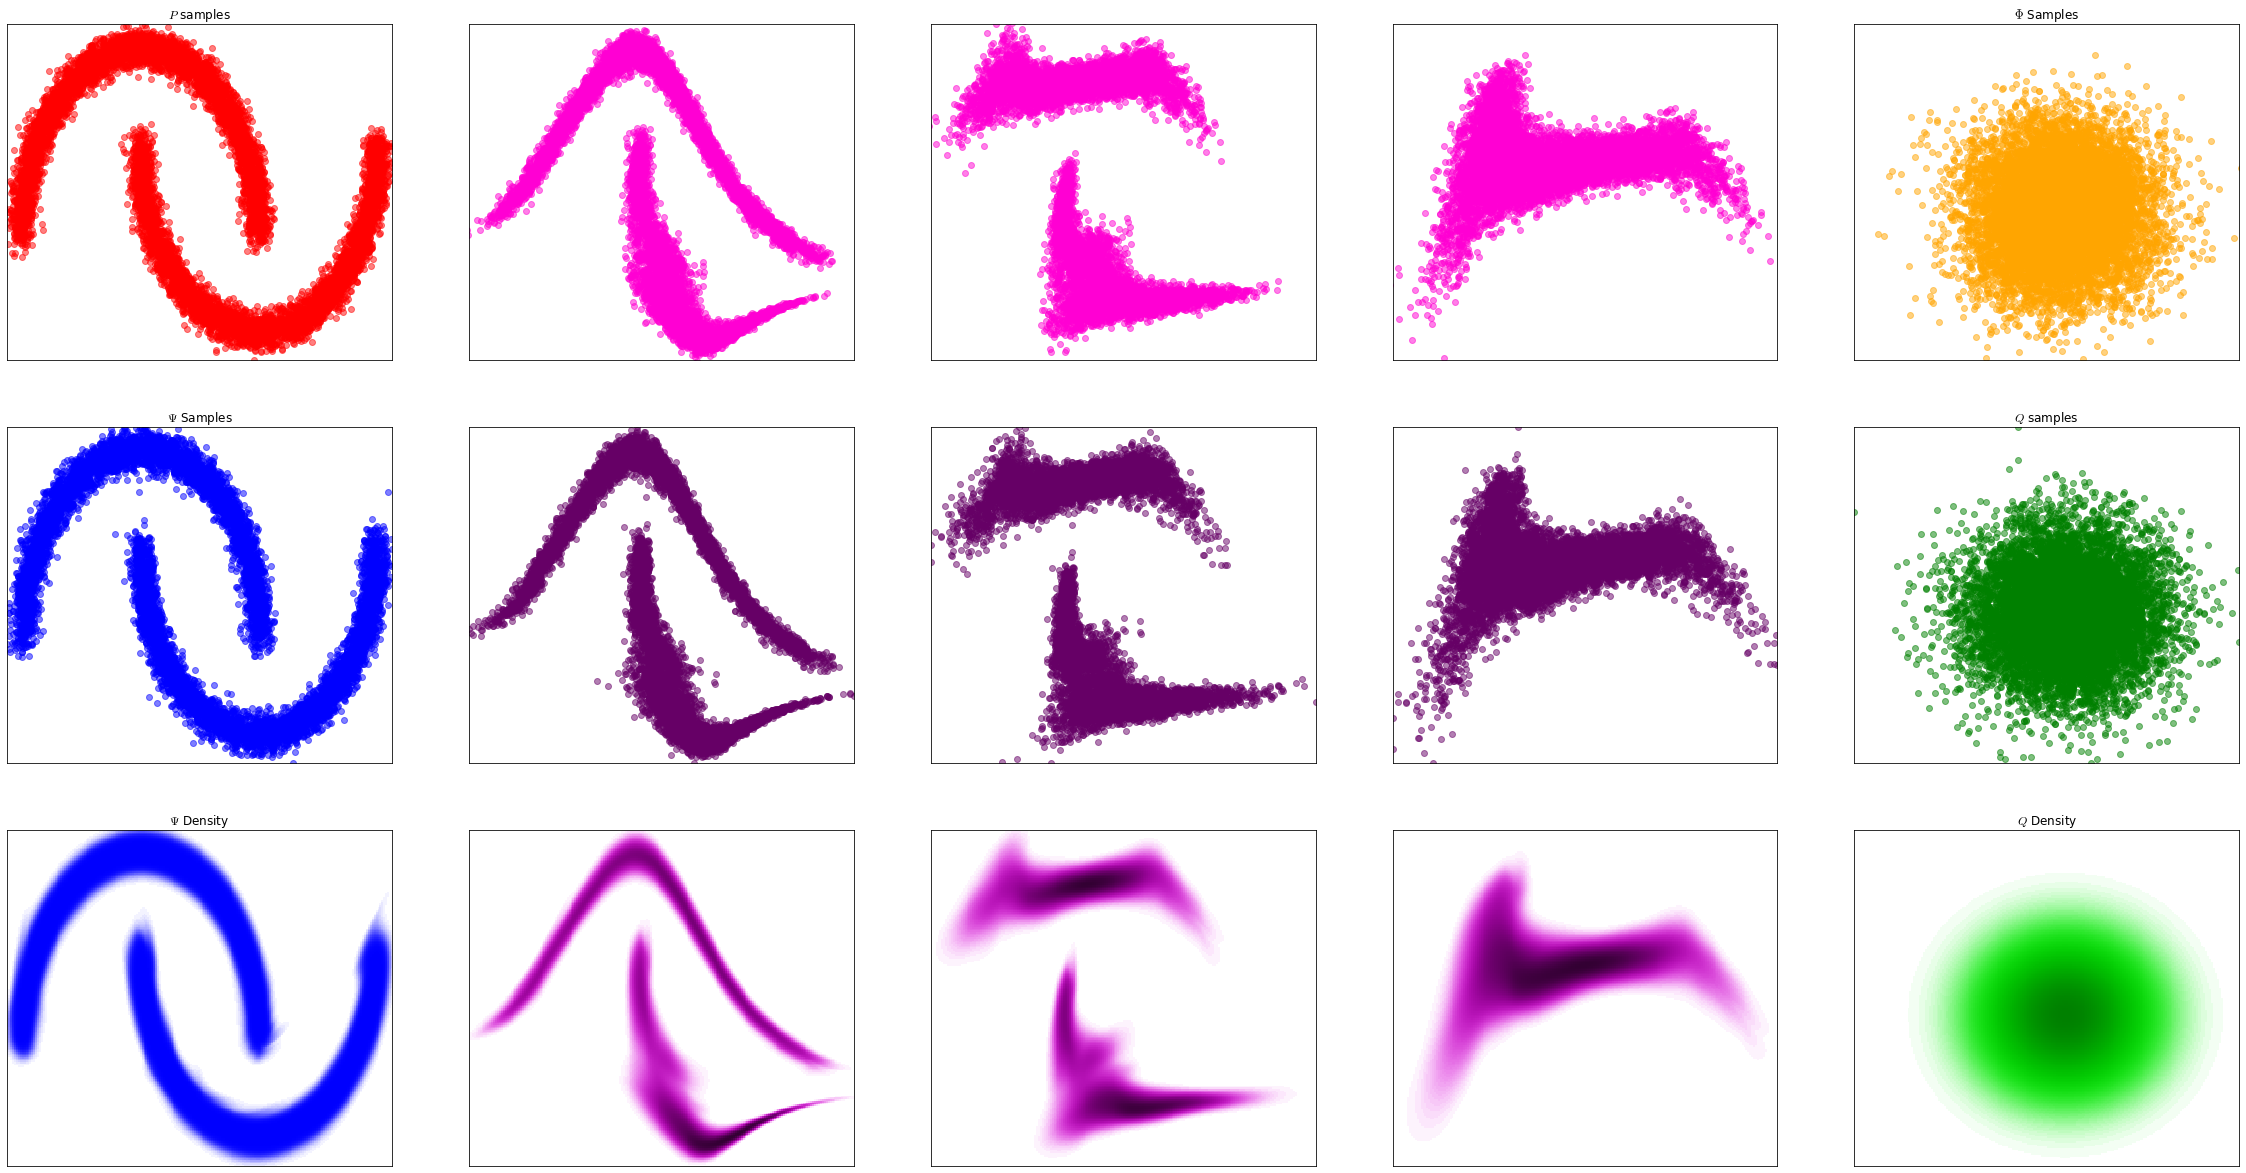

In [9]:
torch.manual_seed(1)
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/5)
structure = [[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]],[DIFDensityEstimatorLayer,5],[RealNVPDensityEstimatorLayer,[128,128,128]]]
realnvp_dif = MixedModelDensityEstimator(target_samples,structure)
realnvp_dif.train(epochs, batch_size, visual = True)
realnvp_dif.model_visual(num_samples=int(num_samples/5), flow = True)

In [ ]:
figure = plt.